**Combinem els csv en un únic**

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

data_1 = pd.read_csv("data/formated_data/data_2020.csv")
data_2 = pd.read_csv("data/formated_data/data_2021.csv")
data_3 = pd.read_csv("data/formated_data/data_2022.csv")
data_4 = pd.read_csv("data/formated_data/data_2023.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/formated_data/data_2020.csv'

In [2]:
columns = data_1.columns.tolist()
data = pd.concat([data_1, data_2, data_3, data_4], ignore_index = True)

In [3]:
data = data.rename(columns={"Unnamed: 0": "index"})
data.head()

,index,station_id,year,month,day,hour,ctx-4,ctx-3,ctx-2,ctx-1,percentage_docks_available
0,0,1.0,2020.0,1.0,1.0,2.0,0.522727,0.503788,0.469697,0.403409,0.354167
1,1,1.0,2020.0,1.0,1.0,7.0,0.289773,0.373106,0.304924,0.238636,0.240530
2,2,1.0,2020.0,1.0,1.0,12.0,0.253788,0.268939,0.350379,0.344697,0.393939
3,3,1.0,2020.0,1.0,1.0,17.0,0.390152,0.346591,0.255814,0.220930,0.186047
4,4,1.0,2020.0,1.0,1.0,22.0,0.083333,0.218992,0.437984,0.515504,0.470930


In [4]:
len(data)

3302532

In [5]:
features = ["index", "station_id", "ctx-4", "ctx-3", "ctx-2", "ctx-1"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[features], data["percentage_docks_available"], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("r2", r2)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

r2 0.8357268338770409
Mean Squared Error: 0.013350321349541212


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualització de les mètriques d'avaluació
metrics = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R2'],
    'Value': [mse, rmse, mae, r2]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Metric value', data=metrics)
plt.title('Evaluation Metrics')
plt.show()

In [6]:
from sklearn.metrics import confusion_matrix
threshold = 0.5
y_pred_labels = [1 if p > threshold else 0 for p in predictions]
y_test_labels = [1 if p > threshold else 0 for p in y_test.values]

# Now use y_pred_labels (containing class labels) for the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
print(cm)

[[184793  32272]
 [ 22606 420836]]


In [7]:
# Probablement l'haureu d'instal·lar
from xgboost import XGBRegressor


model = XGBRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.012233172334614874


In [ ]:
pip install xgboost

In [ ]:
from sklearn.metrics import confusion_matrix
threshold = 0.5
y_pred_labels = [1 if p > threshold else 0 for p in predictions]
y_test_labels = [1 if p > threshold else 0 for p in y_test.values]

# Now use y_pred_labels (containing class labels) for the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
print(cm)

In [ ]:
pip install seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
# Histograma dels errors
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Prediction Error')
plt.title('Distribution of Prediction Errors')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


In [ ]:
data.head()

In [ ]:
# Afegir les prediccions al dataframe de validació
X_test['percentage_docks_pred'] = predictions
X_test['percentage_docks_real'] = y_test

# Calcular les mitjanes anuals dels valors reals i predits
mean_real = X_test.groupby('year')['percentage_docks_real'].mean()
mean_pred = X_test.groupby('year')['percentage_docks_pred'].mean()

# Crear la gràfica
plt.figure(figsize=(10, 6))
plt.plot(mean_real.index, mean_real.values, marker='o', label='Real values', linestyle='-')
plt.plot(mean_pred.index, mean_pred.values, marker='o', label='Predicted values', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Percentage Docks')
plt.title('Real vs predicted values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# PRINCIPAL COMPONENT ANALYSIS
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
# afegim variable target
pca_df['percentage_docks_available'] = data['percentage_docks_available']

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='percentage_docks_available', data=pca_df, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Features')
plt.colorbar(label='Percentage Docks Available')
plt.show()

In [ ]:
print(model.coef_)

In [ ]:
# FEATURE IMPORTANCE ANALYSIS
# amb els models lineals és bastant senzill perquè tens els coeficients per cada feature
# en canvi amb xgboost no existeix la opció model.coef_
feature_importance = model.coef_
feature_names = features
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [ ]:
# CROSS VALIDATION
# Per veure si la performance del model és consistent en diferents subsets de dades
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, data[features], data["percentage_docks_available"], cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
print("Cross-Validated Mean Squared Error:", mean_cv_mse)


In [6]:
from utils import evaluate_models

results = evaluate_models(y_test=y_test, predictions=predictions)

In [7]:
results

{'Mean Squared Error': 0.013350321349541212,
 'Mean Absolute Error': 0.0748510902822149,
 'R2 Score': 0.8357268338770409}

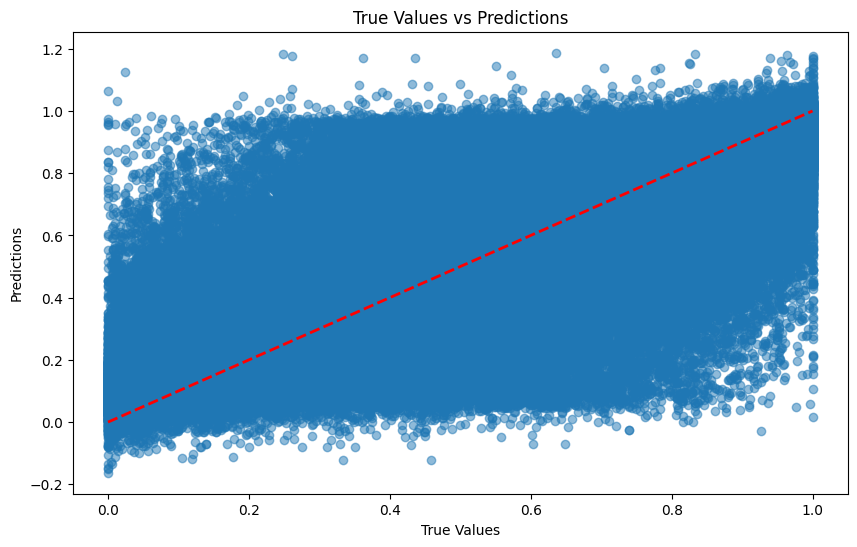

RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

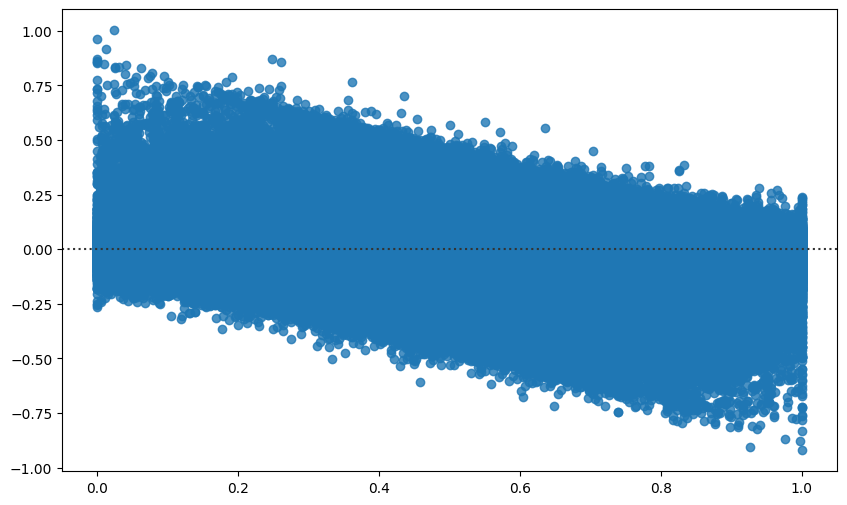

In [9]:
from utils import plot_model_evaluation
plot_model_evaluation(y_test,predictions)

In [10]:
from utils import plot_linear_model_feature_importance
plot_linear_model_feature_importance(model.coef_,predictions)

ImportError: cannot import name 'plot_linear_model_feature_importance' from 'utils' (/home/marina-dalmau/postgrau/Capstone/Gorrapiedra-proyecto/utils.py)